# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [3]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [4]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [ ]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

## Dataset Download
Dowload the Imdb movie reviews dataset


In [5]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [6]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/content/Datasets/Original/aclImdb/train/pos/5323_7.txt
5323_7.txt
5323
There are a number of things that are not correct, although this is not too important since what happened to whom and when is still in dispute. The most blatant liberty with the facts I think is when they start to play at Bruno Koschmidder's Kaiserkeller, when in fact they played at the Indra and moved to the Kaiserkeller later.<br /><br />I agree with Semprinni20 that the film was biased in favour of Pete Best's version, but if he is the story consultant then I guess he calls the shots. I also agree with Semprinni that the recordings Pete Best plays on say the last word on the subject of why he was fired.<br /><br />Although the film is not such a lavish production as the later film "Backbeat", I prefer this film because it is more accurate, and because it has a better script with deeper characterisation.<br /><br />There is plenty in the film that is quite substantial - such as Brian Epstein trying to hide the fa

Little analysis of the dataframe

In [5]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())
    print()

Dataframe structure:
      file_id score  ...  split                                               text
0        5323     7  ...  train  There are a number of things that are not corr...
1        7628     8  ...  train  This movie is one of those "WOW!" movies. Not ...
2        4352    10  ...  train  I was looking through the movie listings in my...
3        9525     8  ...  train  ROAD TO PERDITION can be summed up by Thomas N...
4        4223     8  ...  train  The movie has a great written genre story. It ...
...       ...   ...  ...    ...                                                ...
49995    6577     1  ...   test  What is it with studios like Paramount that ha...
49996     483     2  ...   test  "Dolemite" is the touching story of Dolemite (...
49997    5862     1  ...   test  This is possibly the single worst film i have ...
49998   10228     1  ...   test  HOW MANY MOVIES ARE THERE GOING TO BE IN WHICH...
49999   12355     3  ...   test  Gotta add a comment to this one!!

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

print(X_train[0:1])

Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [ ]:
print(len(vectorizer.vocabulary_))

Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [ ]:
print(X_train)

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [ ]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [ ]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, Y_train)
Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [ ]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing step to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block.


Some notes:
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure given that considers more aspects than the simple accuracy.
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment. 
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned considering the results of the class and the efforts we will see in the solution.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

In [10]:
# write your code here

vectorizer =  TfidfVectorizer()
###################
# Part of Training
###################
print("Fitting and transforming the traing corpus\n")
df_train = df.loc[df['split'] == "train"]
train_corpus = df_train['text'].tolist()
# tokenization and creation of Bag of Words representation using the train corpus
X_train = vectorizer.fit_transform(train_corpus)
# Using the Score as the target 
Y_train = np.array(df_train['score'].tolist(), dtype=np.int64)
print("End of the training\n")
###############
# Part of test
###############
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
# Using the Score as the target
Y_test = np.array(df_test['score'].tolist(), dtype=np.int64)



Fitting and transforming the traing corpus

End of the training



Now run the code below to train your classifier:

In [11]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)

####################################################################

Now test your results running the code below:

R2 score 0.484339
MAE 1.468520
MSE 6.283800

              precision    recall  f1-score   support

           1       0.53      0.84      0.65      5022
           2       0.21      0.05      0.08      2302
           3       0.27      0.12      0.17      2541
           4       0.32      0.34      0.33      2635
           7       0.32      0.24      0.27      2307
           8       0.27      0.25      0.26      2850
           9       0.23      0.04      0.07      2344
          10       0.48      0.77      0.59      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.37      0.43      0.37     25000

[[4201  125  142  236   33   52    6  227]
 [1415  120  202  327   45   36    8  149]
 [1028  143  303  638  115   93   12  209]
 [ 715  110  278  891  221  181   20  219]
 [ 128   24   72  291  552  566   57  617]
 [ 141   11   47  173  430  699   80 1269]
 [ 113    8   28  102  155  470   89 1379]
 [ 

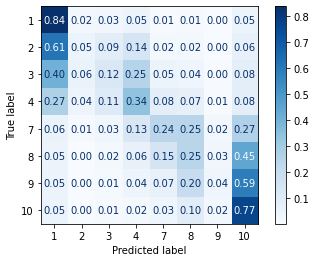

In [13]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Distribution of scores in Train (Before): 
1     5100
10    4732
8     3009
4     2696
7     2496
3     2420
2     2284
9     2263
Name: score, dtype: int64
Distribution of scores in Train (After DownSampling): 
3     2250
4     2250
9     2250
8     2250
7     2250
1     2250
10    2250
2     2250
Name: score, dtype: int64
Fitting and transforming the traing corpus

Working with: 18000 samples
End of the training



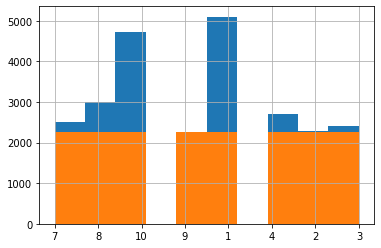

In [7]:
# write your code here

import re
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
  
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)
df_train = df.loc[df['split'] == "train"]
train_corpus = df_train['text'].tolist()

# Checking the distribution of training data
train = df_train[['text', 'score']]
train['score'].hist()
train.head()
print("Distribution of scores in Train (Before): ")
print(df_train['score'].value_counts())

# Balancing the classes considering the class with minimun samples
Samplesize = 2250
df_train_bal = train.groupby('score', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])
df_train_bal['score'].hist()
print("Distribution of scores in Train (After DownSampling): ")
print(df_train_bal['score'].value_counts())

###########################
# Preprocessing data
###########################

# Lemmatization and tokenization
def lemma_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    # Deleting StopWords based on the nltk.corpus
    #filtered_text = [] 
    #stop_words = set(stopwords.words('english')) 
    #for w in tokens: 
    #    if w not in stop_words: 
    #        filtered_text.append(w)   
    # Applying stemming                     
    #return filtered_text
    #stemmer = SnowballStemmer("english", ignore_stopwords=False)
    #return [stemmer.stem(t) for t in filtered_text] 
    return [lemmatizer.lemmatize(t) for t in tokens] 

# Preprocess the text to delete characters that maybe are not useful
def preprocess(text):
    text = re.sub('<br\s/>', ' ', text) 
    # Deleting characters repetead  mroe than 3 times
    text = re.sub('([a-z])\\1\\1+', ' ', text) 
    # Deleting special characters, numbers and blank spaces
    #text = re.sub('[^a-zA-Z]', ' ', text) 
    # Deleting remaining characters ( len = 1)
    #text = re.sub("\\b\\w{1,2}\\b", ' ', text)
    return text

################################
#   VECTORIZER
################################
vectorizer =  TfidfVectorizer( tokenizer=lemma_tokenize,
                              ngram_range=(1,2), min_df=5, sublinear_tf= True)
#################################
# EXtracting Training data
#################################

print("Fitting and transforming the traing corpus\n")
train_corpus = df_train_bal['text'].tolist()
print("Working with: {} samples".format(len(train_corpus))) 
X_train = vectorizer.fit_transform(train_corpus)
#X_train = preprocessing.normalize(X_train, norm='l2')
Y_train = np.array(df_train_bal['score'].tolist(), dtype=np.int64)
print("End of the training\n")

#################################
# EXtracting Testing data
#################################
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['score'].tolist(), dtype=np.int64)

###############
# Clasifier SVC
###############

#Hyper tuning parameters
# Uncomment to run thr Grid Search
"""
parameters = {'intercept_scaling':[0.001, 0.1, 1, 5, 10], 'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(max_iter=1000), parameters, cv=5)
grid.fit(X_train, Y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
"""
    
# creating the classifier with the parameters given above
classifier =  LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Run the code below to train your classifier, then test it with the block that follows.

In [8]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

R2 score 0.577263
MAE 1.294640
MSE 5.151440

              precision    recall  f1-score   support

           1       0.63      0.70      0.66      5022
           2       0.27      0.26      0.26      2302
           3       0.32      0.25      0.28      2541
           4       0.38      0.37      0.37      2635
           7       0.35      0.42      0.38      2307
           8       0.33      0.24      0.28      2850
           9       0.25      0.27      0.26      2344
          10       0.58      0.61      0.59      4999

    accuracy                           0.44     25000
   macro avg       0.39      0.39      0.39     25000
weighted avg       0.43      0.44      0.43     25000

[[3523  632  317  232   61   42   59  156]
 [ 885  588  334  293   65   27   33   77]
 [ 554  412  643  574  160   53   47   98]
 [ 337  295  429  969  312  112   72  109]
 [  59   66   94  223  975  361  246  283]
 [  69   44   84  150  610  676  565  652]
 [  67   37   49   68  302  351  631  839]
 [ 

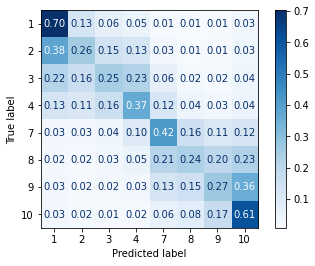

In [9]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)